In [1]:
# Vladimir vapnik

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Encoding data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# split data
from sklearn.model_selection import train_test_split

# Training data
# Linear regression
from sklearn.linear_model import LinearRegression

# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv("position_salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
x = df.iloc[:, 1].values
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [5]:
y = df.iloc[:, 2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [6]:
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
print(x, "\n\n", y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] 

 [[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [7]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
print(x, "\n\n\n", y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] 


 [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


#### Training the svr model on whole dataset

In [8]:
from sklearn.svm import SVR
reg = SVR(kernel = 'rbf')

# In machine learning, the radial basis function kernel,
# or RBF kernel, is a popular kernel function used in various kernelized learning algorithms.
# In particular, it is commonly used in support vector machine classification.

In [9]:
reg.fit(x, y)

C:\Users\lohar\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

#### Predicting a new result

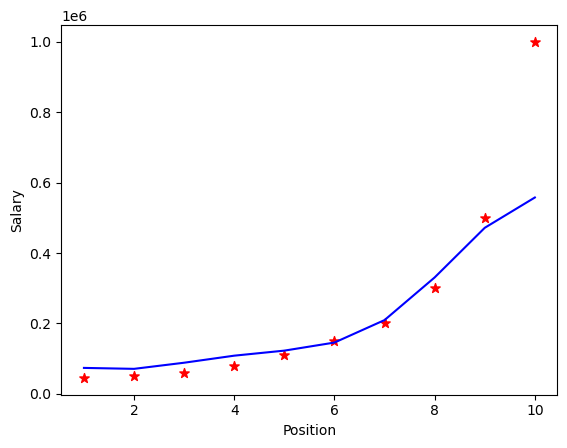

In [10]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = "red", marker = "*", s = 50)
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(reg.predict(x).reshape(-1, 1)), color = "blue")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()